In [3]:
import pandas as pd
train = pd.read_csv('regression_train.csv')

In [4]:
train.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1


In [7]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [8]:
train['cd'] = np.where(train.cd == 'no', 0, 1)
train['multi'] = np.where(train.multi == 'no', 0, 1)
train['premium'] = np.where(train.premium == 'no', 0, 1)

In [11]:
# train.head()
train_n = train/train.max(axis=0)

In [12]:
train_n.head()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,0.277644,0.378788,0.058394,0.1250,0.823529,0.0,0.0,1.0,0.315436,0.090909
1,0.332469,0.500000,0.062044,0.0625,0.823529,0.0,0.0,1.0,0.315436,0.090909
2,0.295425,0.378788,0.124088,0.1250,0.882353,0.0,0.0,1.0,0.315436,0.090909
3,0.342471,0.378788,0.124088,0.2500,0.823529,0.0,0.0,0.0,0.315436,0.090909
4,0.610298,0.500000,0.248175,0.5000,0.823529,0.0,0.0,1.0,0.315436,0.090909


In [13]:
# sns.heatmap(train.corr())
train_n.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.517935,0.704465,0.668503,0.352986,0.150790,-0.021144,0.005149,-0.068813,-0.071111
speed,0.517935,1.000000,0.221766,0.157913,0.203852,0.081967,0.020941,0.098040,-0.029204,-0.022802
hd,0.704465,0.221766,1.000000,0.675287,0.156059,0.059927,-0.022549,0.122342,0.196587,0.197776
ram,0.668503,0.157913,0.675287,1.000000,0.205479,0.079692,-0.046918,0.156537,0.022742,0.021454
screen,0.352986,0.203852,0.156059,0.205479,1.000000,0.015051,-0.052159,0.103076,0.028272,0.052426
cd,0.150790,0.081967,0.059927,0.079692,0.015051,1.000000,0.417062,-0.031111,0.226426,0.209870
multi,-0.021144,0.020941,-0.022549,-0.046918,-0.052159,0.417062,1.000000,0.057411,0.133174,0.167014
premium,0.005149,0.098040,0.122342,0.156537,0.103076,-0.031111,0.057411,1.000000,-0.115509,-0.173311
ads,-0.068813,-0.029204,0.196587,0.022742,0.028272,0.226426,0.133174,-0.115509,1.000000,0.884870
trend,-0.071111,-0.022802,0.197776,0.021454,0.052426,0.209870,0.167014,-0.173311,0.884870,1.000000


In [31]:
from sklearn.linear_model import LinearRegression

features = ['hd','ram','speed','screen','ads','trend','premium','multi']
# features = ['screen','hd','ram','speed']
x = train[features]
y = train.price

reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(reg.intercept_)
print(reg.coef_)

-319.296502191
[  1.77375969e+00   4.29030183e+01   1.37035213e+01   1.38765738e+02
  -1.04145720e-01  -4.38897383e+01  -4.40104859e+02   1.69668470e+02]


In [33]:
list(zip(features, reg.coef_))

[('hd', 1.773759686050066),
 ('ram', 42.90301830394661),
 ('speed', 13.703521253113635),
 ('screen', 138.76573843846921),
 ('ads', -0.10414571967648945),
 ('trend', -43.8897382901608),
 ('premium', -440.10485904139244),
 ('multi', 169.66847037801466)]

In [34]:
test = pd.read_csv('regression_test.csv')
test['cd'] = np.where(test.cd == 'no', 0, 1)
test['multi'] = np.where(test.multi == 'no', 0, 1)
test['premium'] = np.where(test.premium == 'no', 0, 1)
x_test = test[features]
# model = make_pipeline(PolynomialFeatures(1), Ridge())
# model.fit(x,y)
# y = model.predict(x_test)
y = reg.predict(x_test)
test['price'] = y
print y

[ 2503.6977015   2340.56954118  1752.22628195 ...,  4310.41837999
  3346.37834344  3623.90982032]


In [35]:
actual = pd.read_csv('regression_predicted_result.csv')
yy = list(actual.price)

In [36]:
from sklearn import metrics
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, yy)))

('RMSE:', 554.95723199470365)


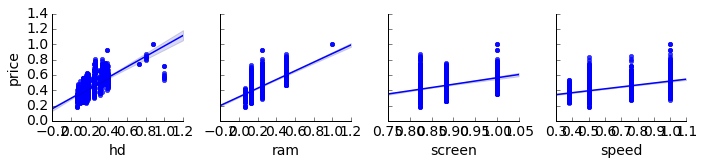

In [30]:
# all_features = ['hd','ram','speed','screen','ads','trend','cd','multi','premium']
f = ['hd','ram','screen','speed']
sns.pairplot(train_n, x_vars=f, y_vars='price', kind='reg')

In [208]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [250]:
model = make_pipeline(PolynomialFeatures(2), Ridge())
model.fit(x,y)
p = model.predict(x_test)

ValueError: Found arrays with inconsistent numbers of samples: [2000 4259]

In [247]:
print train['price'][0]

1499


In [249]:
B0 = 0
B1 = 0
alpha = 0.01

terminal_error = 0.0001
index = 0

while (True):
    
    i = index % len(train['price'])
    p = B1 * train['price'][i] + B0
    err = p - train['trend'][i]
    B1 = B1 - alpha * err
    B0 = train['trend'][i] - B1 * train['price'][i]
    
    print B1, B0
    if abs(err) < abs(terminal_error) or index is 1000:
        break
    index += 1
    

0.01 -13.99
-0.0196 36.182
-0.0588 94.786
0.090552 -166.430648
-1.21882992 4017.0445864
3.65648976 -13509.7296632
75.87216252 -130499.119534
-132.77628441 264889.687398
172.609169733 -384054.402656
-431.522924333 1111172.53016
-2071.3100368 4546526.53077
6421.06111407 -16726863.2021
42379.0033528 -86665060.8566
-63568.5050293 145889720.042
193248.255289 -521577040.025
1109244.98536 -2468070091.42
8097488.39312 -12915493986.0
-51014176.8766 118607961239.0
-168346783.693 352686511838.0
3703629241.24 -1.62774505153e+13
103701618755.0 -1.75774243789e+14
-1.03701618755e+12 2.8984602442e+15
0.000732421875 -1.12036132812
0.00087890625 -1.52685546875
-0.01072265625 45.9815429687
-0.322215820312 416.658408203
1.88496254883 -3721.80103394
-36.1912809375 144585.167345
-361.912809375 1120121.14502
177.337276594 -575281.12527
2525.2828187 -4848542.01189
631.320704674 -1259483.80582
-3156.60352337 8191387.14314
-6944.52775141 17187707.1847
-40000.4798481 79960960.2164
230402.763925 -616327392.5
1036

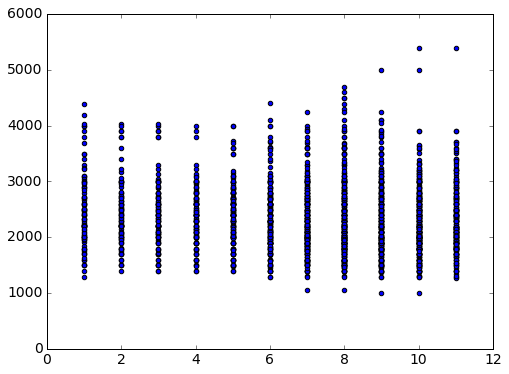

In [246]:
plt.scatter(train['trend'],train['price'])
plt.show()

In [ ]:
def outlierCleaner(feature):
    error = 